## Code and Output

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [2]:
dataset = load_iris()
dataset.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [3]:
dataset.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
y = np.array(dataset.target)
X = pd.DataFrame(dataset.data)

In [5]:
# choosing classes Iris - Versicolor and Iris - Setosa
indices = y < 2
y = y[indices]
# choosing petal length in cm and petal width in cm as the features
X = X[indices].loc[:, [2, 3]]
X = X.rename(columns = {2 : 'petal_length', 3: 'petal_width'})
X.head()

,petal_length,petal_width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [6]:
print(X.shape, y.shape)

(100, 2) (100,)


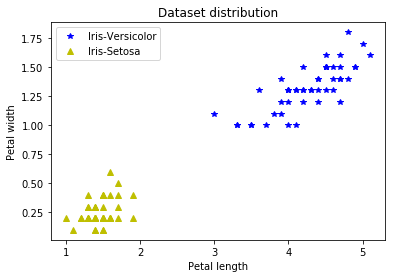

In [7]:
iris_setosa = X[y == 0]
iris_versicolor = X[y == 1]
fig, ax = plt.subplots(1)
ax.plot(iris_versicolor['petal_length'], iris_versicolor['petal_width'], 'b*', label = 'Iris-Versicolor')
ax.plot(iris_setosa['petal_length'], iris_setosa['petal_width'], 'y^', label = 'Iris-Setosa')
plt.xlabel('Petal length')
plt.ylabel('Petal width')
ax.legend()
plt.title('Dataset distribution')
plt.show()

In [8]:
y.resize((y.shape[0], 1))
X = np.array(X)

In [9]:
indices_test = list(range(40, 50))  + list(range(90, 100))
indices_train = list(range(0, 40)) + list(range(50, 90))
y_test = y[indices_test, :]
X_test = X[indices_test, :]
X = X[indices_train, :]
y = y[indices_train, :]


In [10]:
t = np.array(y, dtype = float)
t[t < 1] = -1
t.resize((y.shape[0], 1))
print(X.shape, t.shape)

(80, 2) (80, 1)


In [11]:
X[:, 0] = (X[:, 0] - np.mean(X[:, 0])) / np.std(X[:, 0])
X[:, 1] = (X[:, 1] - np.mean(X[:, 1])) / np.std(X[:, 1])

In [12]:
class SVM:
    def __init__(self):
        pass
    
    def predict(self, X, theta):
        X_new = np.c_[X, np.ones((X.shape[0], 1))]
        y_pred = X_new.dot(theta)
        y_pred[y_pred < 0] = 0
        y_pred[y_pred > 0] = 1
        return y_pred
    
    def compute_hinge_loss(self, X, t, theta):
        X_new = np.c_[X, np.ones((X.shape[0], 1))]
        hinge_loss = 1 - (t * X_new.dot(theta))
        hinge_loss[hinge_loss <= 0] = 0
        return hinge_loss
    
    def compute_error(self, X, t, theta, C):
        hinge_loss = self.compute_hinge_loss(X, t, theta)
        loss = 0.5 * theta.T.dot(theta) + (C * np.sum(hinge_loss, axis = 0))
        return loss
        
    def fit (self, X, t, init_theta, max_iter = 500, C = 0.1, eta = 0.001):
        X_new = np.c_[X, np.ones((X.shape[0], 1))]
        theta = init_theta
        error = np.zeros((max_iter, 1))
        for iteration in range(max_iter):
            hinge_loss = self.compute_hinge_loss(X, t, theta)
            t_new = np.array(t)
            t_new[hinge_loss == 0] = 0
            Xt = -1 * X * t_new
            hinge_loss_gradient = np.sum(Xt)
            gradient = np.sum(theta, axis = 0) + C * hinge_loss_gradient
            theta = theta - eta * gradient
            error[iteration] = self.compute_error(X, t, theta, C)
        plt.plot(range(1, max_iter + 1, 1), error)
        plt.title('Value of Cost function for successive iterations')
        plt.xlabel('Iterations')
        plt.ylabel('Value of Cost Function')
        plt.show()
        return theta
            

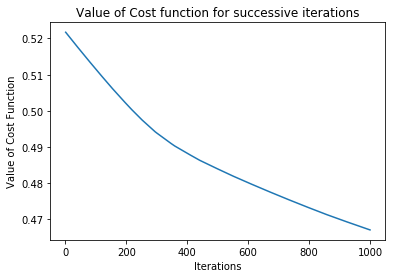

In [13]:
init_theta = np.array([[ 0.03401362], [ 0.51524769],[-0.41041525]])
svm = SVM()
theta = svm.fit(X, t, init_theta, C = 0.008, eta = 0.0001, max_iter = 1000)

In [14]:
y_pred_train = svm.predict(X, theta)
train_accuracy = np.sum(y_pred_train == y) / X.shape[0]
print('Train accuracy is %f' %train_accuracy)

Train accuracy is 0.925000


In [15]:
y_pred_test = svm.predict(X_test, theta)
test_accuracy = np.sum(y_pred_test == y_test) / X_test.shape[0]
print('Test accuracy is %f' %test_accuracy)

Test accuracy is 0.900000
